In [1]:
from deepcage.compute import (
    plot_3d_trajectories
)
from deepcage.auxiliary.detect import detect_triangulation_result
from deeplabcut.pose_estimation_3d.plotting3D import plot2D

from deepcage.project.get import get_labels, get_paired_labels, get_dlc3d_configs
from deepcage.project.edit import read_config
from deepcage.auxiliary.detect import detect_2d_coords
from deepcage.auxiliary.constants import CAMERAS, PAIR_IDXS, pair_cycler

from deepcage.compute.triangulate import triangulate_basis_labels, triangulate_raw_2d_camera_coords
from deepcage.compute.basis import compute_basis_vectors, create_stereo_cam_origmap, map_experiment
from deepcage.compute.utils import rad_to_deg, unit_vector

import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook

C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dty

In [2]:
root = os.path.realpath('H:/Can_cage/DeepCage_DLC_files')
config_path = os.path.join(root, 'DeepCageKeyTest-Can-2019-11-15/config.yaml')

# plot_3d_trajectories(config_path, cm_is_real_idx=True, remap=False, cols=2)
# dfs = detect_triangulation_result(config_path, change_basis=False)
dfs = map_experiment(
        config_path, suffix='_DLC_3D.h5', bonvideos=False, save=False,
        new_orig_map=True, paralell=False, use_cross=False
    )
level1 = dfs['level_1']

Triangulations files detected, and verified
Proceeding to changing basis
Calculating the basis vectors of NorthWest NorthEast
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)

Cross product derived y-axis: [-0.3676315  -0.32128531 -0.87271005]
Origin-subtraction derived y-axis: [-0.21675097  0.67890148  0.7015068 ]
Angle between the two vectors: 138.64659482189393

Calculating the basis vectors of NorthEast EastNorth
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)

Cross product derived y-axis: [-0.9448147  -0.18245529 -0.27209418]
Origin-subtraction derived y-axis: [ 0.25384646 -0.93275646 -0.25598313]
Angle between the two vectors: 90.0

Calculating the basis vectors of EastNorth EastSouth
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)

Cross product derived x-axis: [ 0.53090433  0.10455306 -0.84095734]
Origin-subtraction derived x-axis: [ 0.08503818 -0.56989751  0.8173037 ]
Angle between the two vectors: 134.567973121

In [3]:
tip_level1 = {pair: df for pair, df in level1['tip'].groupby(level=0, axis=1)}
turn_level1 = {pair: df for pair, df in level1['turn'].groupby(level=0, axis=1)}

In [4]:
dlc3d_cfgs = get_dlc3d_configs(config_path)
basis_labels = get_labels(config_path)

cfg = read_config(config_path)
test_dir = os.path.join(cfg['data_path'], 'test')

In [5]:
pair_1 = ('EastNorth', 'EastSouth')
cam_labels_1 = get_paired_labels(config_path, pair_1)['normal']
trian_dict_1, _ = triangulate_basis_labels(
    dlc3d_cfgs[pair_1], cam_labels_1, pair_1, decrement=False, keys=True
)

tip_1 = tip_level1[pair_1].values
turn_1 = turn_level1[pair_1].values

Calculating the basis vectors of EastNorth EastSouth
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [6]:
pair_2 = ('SouthEast', 'SouthWest')
cam_labels_2 = get_paired_labels(config_path, pair_2)['normal']
trian_dict_2, _ = triangulate_basis_labels(
    dlc3d_cfgs[pair_2], cam_labels_2, pair_2, decrement=False, keys=True
)

tip_2 = tip_level1[pair_2].values
turn_2 = turn_level1[pair_2].values

Calculating the basis vectors of SouthEast SouthWest
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [7]:
# fig_1 = plt.figure()
# ax_1 = fig_1.add_subplot(111, projection='3d')

# ax_1.plot(*tip_1.T, 'b')
# ax_1.plot(*turn_1.T, 'm')

# ax_1.scatter(*trian_dict_1['origin'], color='g')
# ax_1.scatter(*trian_dict_1['z-axis'], color='r')
# ax_1.scatter(*trian_dict_1[('x-axis', 'positive')], color='c')
# ax_1.scatter(*trian_dict_1[('y-axis', 'negative')], color='b')
# ax_1.scatter(*trian_dict_1[('y-axis', 'positive')], color='m')

# min_ = np.nanmin(tip_1)
# max_ = np.nanmax(tip_1)

# ax_1.set_xlim(min_, max_)
# ax_1.set_ylim(min_, max_)
# ax_1.set_zlim(min_, max_)

In [8]:
# fig_2 = plt.figure()
# ax_2 = fig_2.add_subplot(111, projection='3d')

# ax_2.plot(*tip_2.T, 'y')
# ax_2.plot(*turn_2.T, 'r')

# ax_2.scatter(*trian_dict_2['origin'], color='0.05')
# ax_2.scatter(*trian_dict_2['z-axis'], color='0.1')
# ax_2.scatter(*trian_dict_2[('y-axis', 'negative')], color='0.15')
# ax_2.scatter(*trian_dict_2[('x-axis', 'positive')], color='0.15')
# ax_2.scatter(*trian_dict_2[('x-axis', 'negative')], color='0.2')



<IPython.core.display.Javascript object>


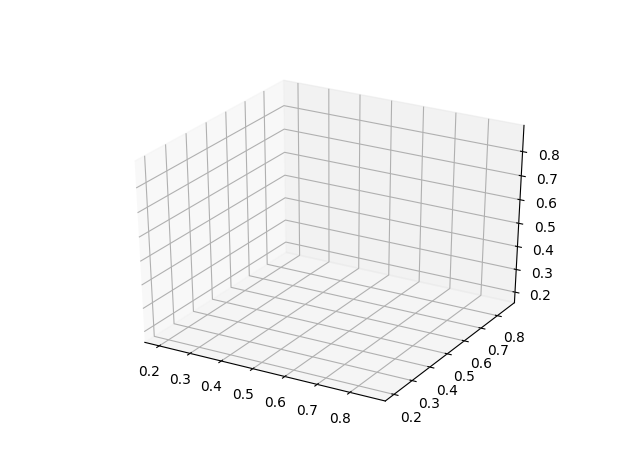

(0.16806620136824335, 0.8915229009177906)

In [9]:
fig_all = plt.figure()
ax_all = fig_all.add_subplot(111, projection='3d')

ax_all.plot(*tip_1.T, 'b')
ax_all.plot(*turn_1.T, 'm')
# ax_all.plot(*tip_2.T, 'y')
# ax_all.plot(*turn_2.T, 'r')

min_ = np.nanmin(tip_1)
max_ = np.nanmax(tip_1)

ax_all.set_xlim(min_, max_)
ax_all.set_ylim(min_, max_)
ax_all.set_zlim(min_, max_)

In [10]:
import pandas as pd

In [11]:
pd.DataFrame(tip_1).loc[np.logical_not(np.all(np.isnan(tip_1), axis=1))]

,0,1,2
46,0.168066,0.891523,0.282178
47,0.168066,0.891523,0.282178
48,0.168066,0.891523,0.282178
49,0.168066,0.891523,0.282178
50,0.168066,0.891523,0.282178
...,...,...,...
201,0.168066,0.891523,0.282178
202,0.168066,0.891523,0.282178
203,0.168066,0.891523,0.282178
204,0.168066,0.891523,0.282178


In [12]:
a = detect_2d_coords(config_path)

H:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level1_onesided
['H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\0_NorthWest_NorthEast\\0_0_NorthWest_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\0_NorthWest_NorthEast\\0_1_NorthEast_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\1_NorthEast_EastNorth\\1_0_NorthEast_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\1_NorthEast_EastNorth\\1_1_EastNorth_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC

In [13]:
a.keys()

dict_keys(['level1_onesided', 'level_1', 'spiral'])

In [14]:
a['level_1']

{('NorthWest',
  'NorthEast'): {'DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000': array([[8.89079571e-01, 4.78578234e+00, 1.14440918e-05, 7.56735802e-02,
          5.44298410e+00, 3.59117985e-05],
         [8.89079571e-01, 5.19855928e+00, 1.70171261e-05, 3.39274645e-01,
          5.77134037e+00, 5.92172146e-05],
         [8.89079571e-01, 5.19855928e+00, 1.10864639e-05, 3.39352846e-01,
          5.77146482e+00, 4.03821468e-05],
         ...,
         [1.26192904e+00, 4.68279791e+00, 1.28448009e-05, 2.21873045e-01,
          5.40273523e+00, 4.12166119e-05],
         [1.26192904e+00, 4.68279791e+00, 9.92417336e-06, 2.21873045e-01,
          5.32884407e+00, 3.48091125e-05],
         [1.06929326e+00, 4.65259075e+00, 1.32918358e-05, 1.88733816e-01,
          5.14884996e+00, 4.75347042e-05]])},
 ('NorthEast',
  'EastNorth'): {'DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000': array([[2.39389706e+00, 4.58138800e+00, 3.12924385e-06, 1.07643652e+00,
          3.65506768e+00, 4.79817390e-06],


In [15]:
trian_dict_2, _ = triangulate_basis_labels(
    dlc3d_cfgs[pair_2], cam_labels_2, pair_2, decrement=False, keys=True
)

Calculating the basis vectors of SouthEast SouthWest
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [16]:
trian_dict_2

{('x-axis',
  'positive'): array([-2.57099163e-15, -4.31645260e-16,  3.15590774e-15]),
 ('x-axis',
  'negative'): array([-5.32088266e-16, -3.26906249e-15,  6.67332334e-15]),
 ('y-axis',
  'negative'): array([-6.52744269e-16, -9.68974810e-16,  2.93188922e-15]),
 'z-axis': array([-1.06209438e-15,  1.81031285e-16,  5.63339401e-15]),
 'origin': array([-1.81451223e-15, -1.62191233e-15,  4.68866436e-15])}

In [113]:
pair_2

('SouthEast', 'SouthWest')

In [19]:
origin = trian_dict_2[('x-axis', 'negative')] + (trian_dict_2[('x-axis', 'positive')] - trian_dict_2[('x-axis', 'negative')]) / 2
origin

array([-1.55153995e-15, -1.85035388e-15,  4.91461554e-15])

In [20]:
x = trian_dict_2[('x-axis', 'positive')] - origin
x

array([-1.01945168e-15,  1.41870862e-15, -1.75870780e-15])

In [21]:
z = trian_dict_2['z-axis'] - origin
z

array([4.89445574e-16, 2.03138516e-15, 7.18778474e-16])

In [28]:
from numpy.linalg import norm
def unit_vector(vector):
    ''' Returns the unit vector of the vector. '''
    return vector / norm(vector)

In [26]:
x_n = unit_vector(x)
z_n = unit_vector(z)

In [27]:
y_n = np.cross(z_n, x_n)

In [30]:
axis_len = np.mean((norm(x), norm(z)))
axis_len

2.3443069453906922e-15

In [31]:
print(x_n, y_n, z_n)

[-0.4112475   0.57230801 -0.70946391] [-0.83837916  0.02337348  0.50482929] [0.22149976 0.91930821 0.32528492]


In [41]:
dfs = detect_triangulation_result(config_path, change_basis=False)
tip = dfs['level_1'][pair_2]['tip']

Triangulations files detected, and verified
The current DeepCage project is ready for changing basis


In [42]:
np.nanmin(tip)

-1.5395914214829316e-14

In [43]:
np.nanmax(tip)

2.5986553727753544e-14

In [128]:
tip_o = tip - origin
np.nanmin(tip_o)

-6.0762905881625536e-12

In [48]:
np.nanmax(tip_o)

2.1071938188350434e-14

In [59]:
tip_o

array([[            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan

In [62]:
tip_x = [np.dot(t, x_n) for t in tip_o]
tip_x

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.6957199139574875e-15,
 1.7174623393011095e-15,
 1.6158108003148501e-15,
 1.5631802974497533e-15,
 1.5060343510315592e-15,
 1.4669488548585664e-15,
 1.4202508126782924e-15,
 1.3219504847119396e-15,
 1.1659092769950724e-15,
 7.921352228276433e-16,
 3.1154543422345606e-16,
 -1.5390533356622935e-16,
 -1.0872297940309254e-15,
 -3.1787553486459168e-15,
 -3.942909719906685e-15,
 -5.7418999007491635e-15,
 -7.86576041002289e-15,
 -9.064231610249471e-15,
 -1.1714006643965567e-14,
 -1.2769948586427046e-14,
 -1.1387547194168613e-14,
 -1.0016657215202082e-14,
 -8.426571393128956e-15,
 -7.251834734059723e-15,
 -6.473379102891322e-15,
 -5.783639536271993e-15,
 -4.92351810431344e-15,
 -4.131088562482808e-15,
 -3.399

In [63]:
tip_y = [np.dot(t, y_n) for t in tip_o]
tip_z = [np.dot(t, z_n) for t in tip_o]

In [69]:
SCALE = 5.3
tip_xs = (tip_x / axis_len) * SCALE
tip_ys = (tip_y / axis_len) * SCALE
tip_zs = (tip_z / axis_len) * SCALE

In [70]:
tip_s = np.array([tip_xs, tip_ys, tip_zs]).T
tip_s.shape

(211, 3)

In [132]:
(tip_o / np.nanmax(tip_o))

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan

<IPython.core.display.Javascript object>


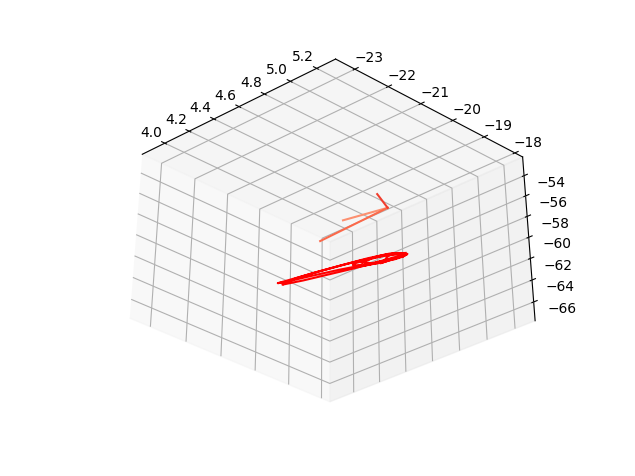

In [139]:
fig_all = plt.figure()
ax_all = fig_all.add_subplot(111, projection='3d')



# ax_all.plot(*ee_tip_maped.T, 'b')
ax_all.plot([0, x_n[0]], [0, x_n[1]], [0, x_n[2]], c=reds[0])
ax_all.plot([0, y_n[0]], [0, y_n[1]], [0, y_n[2]], c=reds[1])
ax_all.plot([0, z_n[0]], [0, z_n[1]], [0, z_n[2]], c=reds[2])
ax_all.plot(*(10*tip_o / np.nanmax(tip_o)).T, 'r')

min_ = np.nanmin(tip_s)
max_ = np.nanmax(tip_s)

# ax_all.set_xlim(min_, max_)
# ax_all.set_ylim(min_, max_)
# ax_all.set_zlim(min_, max_)

# ax_all.set_xlabel('x')
# ax_all.set_ylabel('y')
# ax_all.set_zlabel('z')

In [79]:
o_map = np.array([x_n, y_n, z_n]).T

In [77]:
x_n

array([-0.4112475 ,  0.57230801, -0.70946391])

In [78]:
o_map[0]

array([-0.4112475 ,  0.57230801, -0.70946391])

In [89]:
trian_dict_1

{('y-axis',
  'positive'): array([-3.10145292e-12,  2.07137243e-12,  4.43862103e-12]),
 ('y-axis',
  'negative'): array([2.09418591e-12, 2.07421330e-12, 7.71903023e-12]),
 ('x-axis',
  'positive'): array([-7.56888253e-13,  3.77002170e-12,  3.64478898e-12]),
 'z-axis': array([ 6.16029737e-14, -2.70850590e-12,  5.84122388e-12]),
 'origin': array([-8.86313331e-13,  2.00124814e-12,  5.93882693e-12])}

In [88]:
origin = trian_dict_1[('y-axis', 'negative')] + (trian_dict_1[('y-axis', 'positive')] - trian_dict_1[('y-axis', 'negative')]) / 2
origin

array([-5.03633508e-13,  2.07279286e-12,  6.07882563e-12])

In [91]:
y = trian_dict_1[('y-axis', 'positive')] - origin

In [92]:
z = trian_dict_1['z-axis'] - origin

In [93]:
y_n = unit_vector(y)
z_n = unit_vector(z)

In [106]:
x_n = np.cross(y_n, z_n)

In [107]:
ee_map = np.array([x_n, y_n, z_n]).T

In [108]:
ee_tip = dfs['level_1'][pair_1]['tip']

In [109]:
axis_len = np.mean((norm(y), norm(z)))

In [110]:
ee_tip_maped = SCALE * (ee_tip @ ee_map) / axis_len

<IPython.core.display.Javascript object>


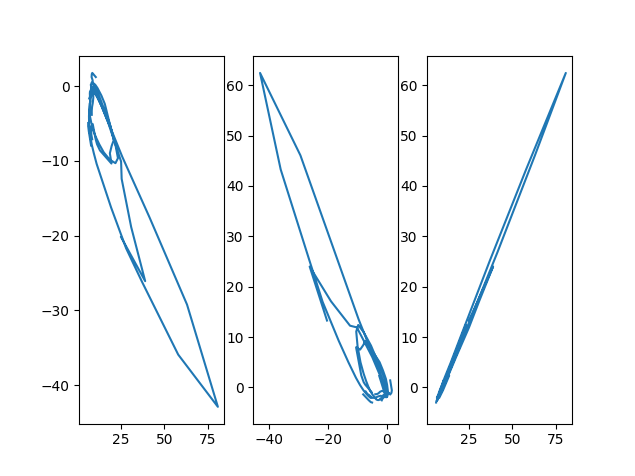

In [116]:
fig_ee = plt.figure()
ax_xy = fig_ee.add_subplot(131)
ax_yz = fig_ee.add_subplot(132)
ax_xz = fig_ee.add_subplot(133)

ax_xy.plot(ee_tip_maped[:, 0], ee_tip_maped[:, 1])
ax_yz.plot(ee_tip_maped[:, 1], ee_tip_maped[:, 2])
ax_xz.plot(ee_tip_maped[:, 0], ee_tip_maped[:, 2])

<IPython.core.display.Javascript object>


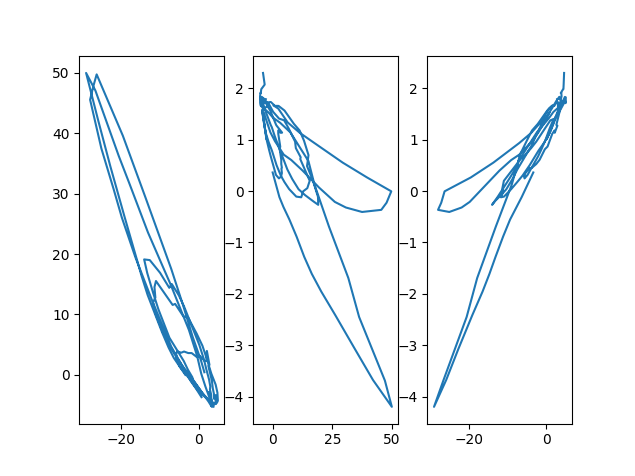

In [120]:
fig_ss = plt.figure()
ax_xy = fig_ss.add_subplot(131)
ax_yz = fig_ss.add_subplot(132)
ax_xz = fig_ss.add_subplot(133)

ax_xy.plot(tip_s[:, 0], tip_s[:, 1])
ax_yz.plot(tip_s[:, 1], tip_s[:, 2])
ax_xz.plot(tip_s[:, 0], tip_s[:, 2])

<IPython.core.display.Javascript object>


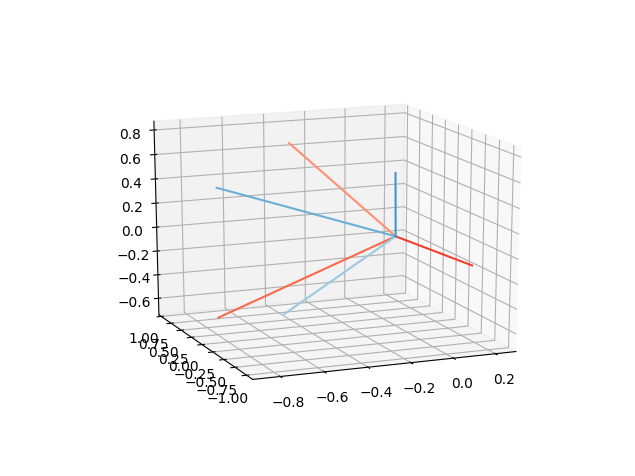

In [123]:
ee_x, ee_y, ee_z = o_map.T

fig_axis = plt.figure()
ax_axis = fig_axis.add_subplot(111, projection='3d')

reds = plt.cm.Reds(np.linspace(0.38, 0.62, 3))
ax_axis.plot([0, x_n[0]], [0, x_n[1]], [0, x_n[2]], c=reds[0])
ax_axis.plot([0, y_n[0]], [0, y_n[1]], [0, y_n[2]], c=reds[1])
ax_axis.plot([0, z_n[0]], [0, z_n[1]], [0, z_n[2]], c=reds[2])

blues = plt.cm.Blues(np.linspace(0.38, 0.62, 3))
ax_axis.plot([0, ee_x[0]], [0, ee_x[1]], [0, ee_x[2]], c=blues[0])
ax_axis.plot([0, ee_y[0]], [0, ee_y[1]], [0, ee_y[2]], c=blues[1])
ax_axis.plot([0, ee_z[0]], [0, ee_z[1]], [0, ee_z[2]], c=blues[2])